In [2]:
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib notebook

In [3]:
conf = config.Config()

In [4]:
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
ch = slowcon.channel_id_by_name['uB_Cryo_IFIX_1_0/PT102']

In [5]:
now = datetime.datetime.now()
one_week_ago = now - datetime.timedelta(days=7)

In [6]:
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

In [7]:
slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
result = slowcon.cur.fetchall()

In [8]:
x = [datetime.datetime.fromtimestamp(i[1]) for i in result]
y = [i[2] for i in result]

<IPython.core.display.Javascript object>


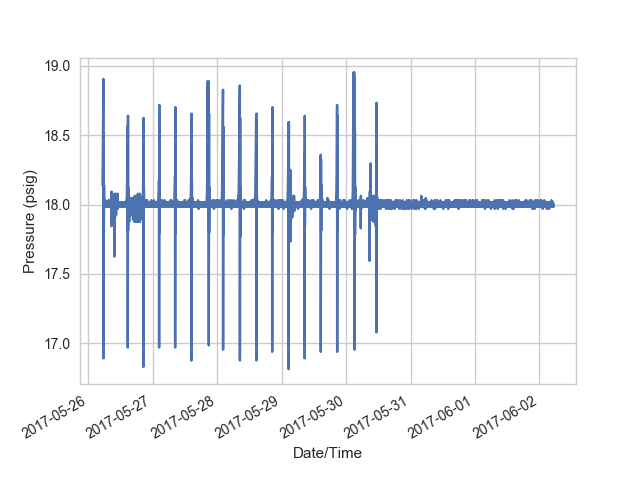

In [11]:
ax = plt.figure()
plt.plot(x,y)
plt.xlabel('Date/Time')
plt.ylabel('Pressure (psig)')
ax.autofmt_xdate()